
# Analyzing SAT and ACT Scores and Test-Optional Policies Nationwide

## Problem Statement

Test-optional college admissions policies greatly expanded in 2020 and 2021 due to the COVID-19 pandemic. This change further complicated the already complex and time-intensive college application process for students and their families.

This project aims to increase transparency in the college application process by exploring the following:
* the current landscape of test-optional policies among colleges and universities across the U.S
* whether there is a relationship between SAT and ACT scores and college acceptance rates
* whether there are trends among SAT and ACT scores and a variety of intended college majors.<br>

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
<br>

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets

<br><b>sat_2019_by_intended_college_major.csv</b>

This data set describes the mean SAT reading/writing scores and the mean SAT math scores by intended college major in 2019. It also outlines the amount of test takers per intended college major, along with the percentage of students who indicated each major out of the total test takers. There are 38 different intended college major groups outlined in this data set.

<br><b>sat_act_by_college.csv</b>

This data set describes the test-optional policies, policy years, policy details, number of applicants, acceptance rates, and SAT and ACT score ranges for over 400 colleges and universities across the U.S. The data is ordered by acceptance rate.<br><br>

### Outside Research

<b>Test Optional Information</b><br>
Test-optional college admissions policies greatly expanded in 2020 and 2021 due to the COVID-19 pandemic, which further complicated college application process for students and their families ([source](https://www.smithsonianmag.com/innovation/has-pandemic-put-end-to-sat-act-180978167/)). Many colleges now have permanent test-optional policies, while many others instituted policies that will lapse in the next few years ([source](https://www.compassprep.com/college-profiles/)).

<b>Additional SAT score information</b><br>
Total mean SAT score is not the only score considered. SAT scores vary between intended college majors ([source](https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf)). Students intending to major in STEM and social science-related topics generally have higher total mean SAT Scores. Relative performance is important when incoming students need to present test scores when applying to accelerated math and science programs/tracks or engineering-focused schools ([source](https://www.techpoweredmath.com/what-sat-score-required-engineering/)). More selective schools also tend to have higher requirements for standardized test scores ([source](https://www.compassprep.com/college-profiles/)).

<br><br>

----

<br>

## Data Import and Cleaning<br>


In [1]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

<br><br><b>Import data.</b>

In [2]:
sat_major = pd.read_csv('../Data/sat_2019_by_intended_college_major.csv')

In [3]:
sat_act_college = pd.read_csv('../Data/sat_act_by_college.csv')

<b><br><br>Display the data: print the first 5 rows of each dataframe to your Jupyter notebook. </b>

In [4]:
sat_major.head(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [5]:
sat_act_college.head(5)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


<b><br><br>Check for missing values. </b>

In [6]:
sat_major.isna().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

In [7]:
sat_act_college.isna().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

<b><br><br>Checking for potential issues with the observations. </b>

In [8]:
print(max(sat_major['ReadingWriting']), max(sat_major['Math']))

597 646


In [9]:
print(max(sat_act_college['SAT Total 25th-75th Percentile']), max(sat_act_college['ACT Total 25th-75th Percentile']))

990-1230 35-36


In [10]:
sat_act_college['Test Optional?'].value_counts() #the null values in "Applies to Class Year" are for schools that are not test optional

Yes         347
No           26
Yes (TB)     25
Yes*         16
Yes (TF)      2
Name: Test Optional?, dtype: int64

<b><br><br>Fixing errors. </b>

In [11]:
sat_act_college['Applies to Class Year(s)'].fillna("N/A",inplace=True) #fills null values with "not applicable" because the schools do not have a test optional policy
sat_act_college['Applies to Class Year(s)'].value_counts()

2021                        196
All / Permanent Policy      158
N/A                          26
2021 2022 2023               15
2021 2022                    11
2021 2022 2023 2024           9
2021 2022 2023 2024 2025      1
Name: Applies to Class Year(s), dtype: int64

<b><br><br>Displaying the data types of each feature. </b>

In [12]:
sat_major.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

In [13]:
sat_act_college.dtypes

School                            object
Test Optional?                    object
Applies to Class Year(s)          object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

<b> <br> <br>Fixing incorrect data types. </b>

In [14]:
#changing "Percent" to float in sat_major using percent_to_float function
def percent_to_float(percent):
    flt = float(percent.split('%')[0])
    return flt


sat_major['Percent'] = sat_major['Percent'].map(percent_to_float)

In [15]:
sat_major.dtypes

IntendedCollegeMajor     object
TestTakers               object
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

In [16]:
#changing "Accept Rate" to float in sat_college using percent_to_float function
sat_act_college['Accept Rate'] = sat_act_college['Accept Rate'].map(percent_to_float)

In [17]:
sat_act_college.dtypes

School                             object
Test Optional?                     object
Applies to Class Year(s)           object
Policy Details                     object
Number of Applicants                int64
Accept Rate                       float64
SAT Total 25th-75th Percentile     object
ACT Total 25th-75th Percentile     object
dtype: object

<b> <br>Renaming columns for consistency and clarity. </b>

In [18]:
sat_major.columns = ['intended_college_major', 'num_sat_takers','percent_of_majors', 'total_score','mean_sat_reading_writing','mean_sat_math']

In [19]:
sat_act_college.columns = ['school', 'are_tests_optional','last_class_year', 'policy_details','num_of_applicants','acceptance_rate', 'sat_total_middle_range', 'act_total_middle_range']

<b><br>Additional cleaning.</b>

In [20]:
#isolating 25th and 75th percentile scores
def range_25(string):
    if string == '--':
        pass
    else:
        splitstring = string.split('-')[0]
        return float(splitstring)
    
def range_75(string):
    if string == '--':
        pass
    else:
        splitstring2 = string.split('-')[1]
        return float(splitstring2)

In [21]:
#creating new columns with 25th and 75th percentiles

sat_act_college['sat_25th_percentile'] = sat_act_college['sat_total_middle_range'].map(range_25)
sat_act_college['sat_75th_percentile'] = sat_act_college['sat_total_middle_range'].map(range_75)
sat_act_college['act_25th_percentile'] = sat_act_college['act_total_middle_range'].map(range_25)
sat_act_college['act_75th_percentile'] = sat_act_college['act_total_middle_range'].map(range_75)

In [22]:
sat_act_college.head(5)

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3,1440-1570,32-35,1440.0,1570.0,32.0,35.0
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7,1460-1580,33-35,1460.0,1580.0,33.0,35.0
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5,1440-1570,32-35,1440.0,1570.0,32.0,35.0
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5,1450-1560,33-35,1450.0,1560.0,33.0,35.0
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1,1460-1570,33-35,1460.0,1570.0,33.0,35.0


In [23]:
sat_act_college['last_class_year'] = sat_act_college['last_class_year'].replace('All / Permanent Policy', 'Permanent') 
def new_years(string):
    newyear = string.split(' ')[-1]
    if len(newyear) == 4:
        return int(newyear)
    else:
        return newyear #make this column easier to visualize


In [24]:
sat_act_college['last_class_year'] = sat_act_college['last_class_year'].map(new_years) #changes total years to last year

<br><br>

----

<br>

## Data Dictionary <br>


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**intended_college_major**|*object*|College Board SAT Suite 2019|Student self-selected intended college majors, 38 total| 
|**num_sat_takers**|*object*|College Board SAT Suite 2019|Number of test takers by intended college major|
|**percent_of_majors**|*float*|College Board SAT Suite 2019|Percent (%) of test takers with intended college major out of total test takers|
|**total_score**|*int*|College Board SAT Suite 2019|Mean total SAT score (out of 1600)|
|**mean_sat_reading_writing**|*int*|College Board SAT Suite 2019|Mean reading and writing SAT score (out of 800)|
|**mean_sat_math**|*int*|College Board SAT Suite 2019|Mean math SAT score (out of 800)|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*object*|Compass Education Group|College or university name| 
|**are_tests_optional**|*object*|Compass Education Group|Yes or No statement regarding presence of test-optional policies at the school|
|**last_class_year**|*object*|Compass Education Group|The last application year the test-optional policy will be in place|
|**policy_details**|*object*|Compass Education Group|Details of the test optional policy|
|**num_of_applicants**|*int64*|Compass Education Group|Number of applicants to the school|
|**acceptance_rate**|*float64*|Compass Education Group|Percent (%) of students accepted among those who applied|
|**sat_total_middle_range**|*object*|Compass Education Group|Range of 25th and 75th percentile SAT scores accepted by the school|
|**act_total_middle_range**|*object*|Compass Education Group|Range of 25th and 75th percentile ACT scores accepted by the school|
|**sat_25th_percentile**|*float64*|Compass Education Group|25th percentile of school's accepted SAT scores|
|**sat_75th_percentile**|*float64*|Compass Education Group|75th percentile of school's accepted SAT scores|
|**act_25th_percentile**|*float64*|Compass Education Group|25th percentile of school's accepted ACT scores|
|**act_75th_percentile**|*float64*|Compass Education Group|75th percentile of school's accepted SAT scores|

<br><br>

----

<br>

## Data Dictionary <br>


<b>Summary statistics. </b>

In [25]:
sat_major.describe()

,percent_of_majors,total_score,mean_sat_reading_writing,mean_sat_math
count,38.000000,38.000000,38.000000,38.000000
mean,2.578947,1058.500000,535.500000,523.000000
std,3.997510,82.445969,41.362439,43.386385
min,0.000000,916.000000,458.000000,456.000000
25%,0.000000,988.250000,501.250000,486.500000
50%,1.000000,1066.500000,537.000000,527.000000
75%,3.500000,1115.500000,569.750000,542.250000
max,18.000000,1242.000000,597.000000,646.000000


In [26]:
sat_act_college.describe()

,num_of_applicants,acceptance_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
count,416.000000,416.000000,410.000000,410.000000,410.000000,410.000000
mean,17481.759615,55.703365,1167.008537,1358.892683,24.712927,29.889756
std,17447.621897,24.211741,129.586121,111.431443,4.127758,3.154675
min,211.000000,4.300000,793.000000,1050.000000,15.000000,19.000000
25%,5313.000000,37.625000,1070.000000,1270.000000,22.000000,28.000000
50%,11622.000000,61.300000,1150.000000,1350.000000,24.000000,30.000000
75%,23599.750000,74.225000,1250.000000,1440.000000,28.000000,32.000000
max,111322.000000,99.900000,1530.000000,1580.000000,35.000000,36.000000


<br><br>

----

<br>

## Investigating trends<br>


<b>
    
### sat_2019_by_intended_college_major 

</b>

In [27]:
sat_major.head(1)

,intended_college_major,num_sat_takers,percent_of_majors,total_score,mean_sat_reading_writing,mean_sat_math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1.0,977,496,481


In [28]:
sat_major.sort_values(by = 'total_score', ascending=False).head() #sorts dataframe by total score and takes the top 5 highest

,intended_college_major,num_sat_takers,percent_of_majors,total_score,mean_sat_reading_writing,mean_sat_math
19,Mathematics and Statistics,"16,508",1.0,1242,597,646
27,Physical Sciences,"26,318",1.0,1203,597,606
32,Social Sciences,"33,356",2.0,1164,594,570
6,Computer and Information Sciences and Support ...,"79,736",4.0,1156,571,585
22,Multi/Interdisciplinary Studies,"2,979",0.0,1155,581,574


The majors with the top 5 highest total SAT scores are Math and Stats, Physical Sciences (e.g. chemistry, physics, etc.), Social Sciences (e.g. sociology, political science, etc.), Computer and Information Sciences and Support Services, and Multi/Interdisciplinary Studies (personalized programs).<br><br>

In [29]:
sat_major.sort_values(by = 'mean_sat_reading_writing', ascending=False).head() #sorts dataframe by mean reading/writing score and takes the top 5 highest

,intended_college_major,num_sat_takers,percent_of_majors,total_score,mean_sat_reading_writing,mean_sat_math
19,Mathematics and Statistics,"16,508",1.0,1242,597,646
27,Physical Sciences,"26,318",1.0,1203,597,606
32,Social Sciences,"33,356",2.0,1164,594,570
11,English Language and Literature/Letters,"16,233",1.0,1119,585,533
17,"Liberal Arts and Sciences, General Studies and...","8,611",0.0,1140,584,556


The majors with the top 5 highest reading and writing SAT scores are Math and Stats, Physical Sciences (e.g. chemistry, physics, etc.), Social Sciences (e.g. sociology, political science, etc.), English Language and Literature/Letters, and Liberal Arts and Sciences, General Studies and Humanities. <br><br>

In [30]:
sat_major.sort_values(by = 'mean_sat_math', ascending=False).head() #sorts dataframe by mean math score and takes the top 5 highest

,intended_college_major,num_sat_takers,percent_of_majors,total_score,mean_sat_reading_writing,mean_sat_math
19,Mathematics and Statistics,"16,508",1.0,1242,597,646
27,Physical Sciences,"26,318",1.0,1203,597,606
6,Computer and Information Sciences and Support ...,"79,736",4.0,1156,571,585
9,Engineering,"194,127",11.0,1139,559,581
22,Multi/Interdisciplinary Studies,"2,979",0.0,1155,581,574


**The majors with the top 5 highest math SAT scores are Math and Stats, Physical Sciences (e.g. chemistry, physics, etc.), Computer and Information Sciences and Support Services, Engineering, and Multi/Interdisciplinary Studies (personalized programs).** <br> <br> 

<b>
    
### sat_act_college 

</b>

In [31]:
sat_act_college.head(3)

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3,1440-1570,32-35,1440.0,1570.0,32.0,35.0
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7,1460-1580,33-35,1460.0,1580.0,33.0,35.0
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5,1440-1570,32-35,1440.0,1570.0,32.0,35.0


In [32]:
sat_act_college.sort_values(by = 'sat_25th_percentile', ascending=False).head() #sorts dataframe by mean reading/writing score and takes the top 5 highest

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
5,California Institute of Technology,Yes (TB),2022,CalTech has adopted a two-year Test Blind poli...,8367,6.4,1530-1560,35-36,1530.0,1560.0,35.0,36.0
6,Massachusetts Institute of Technology,Yes,2021,MIT has adopted a one-year test optional polic...,21706,6.7,1500-1570,34-36,1500.0,1570.0,34.0,36.0
31,Harvey Mudd College,Yes,2021,Harvey Mudd has adopted a one-year test option...,4045,13.7,1490-1570,33-35,1490.0,1570.0,33.0,35.0
8,University of Chicago,Yes,Permanent,UChicago offers a test optional policy which a...,32283,7.3,1490-1570,33-35,1490.0,1570.0,33.0,35.0
35,Washington University in St. Louis,Yes,2021,Washington University in St. Louis has adopted...,31320,15.0,1470-1570,32-35,1470.0,1570.0,32.0,35.0


**Top 5 schools based on SAT 25th percentile: Cal Tech, MIT, Harvey Mudd, University of Chicago, and Wash U St. Louis.** <br><br>

In [33]:
sat_act_college.sort_values(by = 'sat_75th_percentile', ascending=False).head() #sorts dataframe by mean reading/writing score and takes the top 5 highest

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7,1460-1580,33-35,1460.0,1580.0,33.0,35.0
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3,1440-1570,32-35,1440.0,1570.0,32.0,35.0
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5,1440-1570,32-35,1440.0,1570.0,32.0,35.0
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1,1460-1570,33-35,1460.0,1570.0,33.0,35.0
6,Massachusetts Institute of Technology,Yes,2021,MIT has adopted a one-year test optional polic...,21706,6.7,1500-1570,34-36,1500.0,1570.0,34.0,36.0


**Top 5 schools based on SAT 75th percentile: Harvard, Stanford, Princeton, Yale, and MIT.** <br><br>

In [34]:
sat_act_college.sort_values(by = 'act_25th_percentile', ascending=False).head() #sorts dataframe by mean reading/writing score and takes the top 5 highest

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
5,California Institute of Technology,Yes (TB),2022,CalTech has adopted a two-year Test Blind poli...,8367,6.4,1530-1560,35-36,1530.0,1560.0,35.0,36.0
6,Massachusetts Institute of Technology,Yes,2021,MIT has adopted a one-year test optional polic...,21706,6.7,1500-1570,34-36,1500.0,1570.0,34.0,36.0
37,Carnegie Mellon University,Yes,2021,Carnegie Mellon has adopted a one-year test op...,27634,15.4,1460-1560,33-35,1460.0,1560.0,33.0,35.0
10,University of Pennsylvania,Yes,2021,UPenn has adopted a one-year test optional pol...,44961,7.7,1450-1560,33-35,1450.0,1560.0,33.0,35.0
20,Rice University,Yes,2021,Rice has adopted a one-year test optional poli...,20923,11.1,1450-1560,33-35,1450.0,1560.0,33.0,35.0


**Top 5 schools based on ACT 25th percentile: Cal Tech, MIT, CMU, UPenn, and Rice.** <br><br>

In [35]:
sat_act_college.sort_values(by = 'act_75th_percentile', ascending=False).head() #sorts dataframe by mean reading/writing score and takes the top 5 highest

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
5,California Institute of Technology,Yes (TB),2022,CalTech has adopted a two-year Test Blind poli...,8367,6.4,1530-1560,35-36,1530.0,1560.0,35.0,36.0
6,Massachusetts Institute of Technology,Yes,2021,MIT has adopted a one-year test optional polic...,21706,6.7,1500-1570,34-36,1500.0,1570.0,34.0,36.0
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3,1440-1570,32-35,1440.0,1570.0,32.0,35.0
15,Northwestern University,Yes,2021,Northwestern has adopted a one-year test optio...,40585,9.1,1440-1550,33-35,1440.0,1550.0,33.0,35.0
44,Northeastern University,Yes,2021,Northeastern University has adopted a one-year...,62263,18.1,1390-1540,32-35,1390.0,1540.0,32.0,35.0


**Top 5 schools based on ACT 75th percentile: Cal Tech, MIT, Stanford, Northwestern, and Northeastern.** <br><br>

In [36]:
top_25 = sat_act_college.head(25) #represents the top 25 colleges based on acceptance rate (data was already ordered by "acceptance_rate")

In [37]:
top_25.describe()

,num_of_applicants,acceptance_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,30470.440000,8.472000,1421.600000,1550.800000,32.120000,34.800000
std,22165.350653,2.384939,63.487532,24.650896,1.615549,0.645497
min,6066.000000,4.300000,1270.000000,1480.000000,27.000000,33.000000
25%,10569.000000,6.700000,1390.000000,1540.000000,31.000000,35.000000
50%,32283.000000,8.800000,1440.000000,1560.000000,33.000000,35.000000
75%,40203.000000,10.600000,1460.000000,1570.000000,33.000000,35.000000
max,111322.000000,12.300000,1530.000000,1580.000000,35.000000,36.000000


**Descriptive statistics for the top 25 schools based on acceptance rate.**<br><br>

In [38]:
permanent_test_optional = sat_act_college['last_class_year'] == 'Permanent' #isolates schools with permanent test-optional policies
sat_act_college[permanent_test_optional].head(5) 

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
8,University of Chicago,Yes,Permanent,UChicago offers a test optional policy which a...,32283,7.3,1490-1570,33-35,1490.0,1570.0,33.0,35.0
12,Bowdoin College,Yes,Permanent,Bowdoin College offers a test optional policy ...,9332,8.8,1330-1520,31-34,1330.0,1520.0,31.0,34.0
23,Bates College,Yes,Permanent,Bates offers a test optional policy which allo...,8222,12.1,1270-1480,29-33,1270.0,1480.0,29.0,33.0
28,Colby College,Yes,Permanent,Colby College offers a test optional policy wh...,12313,13.0,1350-1510,31-33,1350.0,1510.0,31.0,33.0
29,Pitzer College,Yes,Permanent,Pitzer offers a test optional policy which all...,4358,13.3,1340-1490,30-33,1340.0,1490.0,30.0,33.0


Mask showing schools that have a permanent test optional policy.

<br><br>

----

<br>

## Visualizations<br>


In [39]:
sat_act_college.corr()

,num_of_applicants,acceptance_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
num_of_applicants,1.000000,-0.318760,0.252431,0.254671,0.191129,0.215088
acceptance_rate,-0.318760,1.000000,-0.798352,-0.765868,-0.779196,-0.691157
sat_25th_percentile,0.252431,-0.798352,1.000000,0.959045,0.963363,0.916932
sat_75th_percentile,0.254671,-0.765868,0.959045,1.000000,0.943740,0.943053
act_25th_percentile,0.191129,-0.779196,0.963363,0.943740,1.000000,0.950323
act_75th_percentile,0.215088,-0.691157,0.916932,0.943053,0.950323,1.000000


<AxesSubplot:>

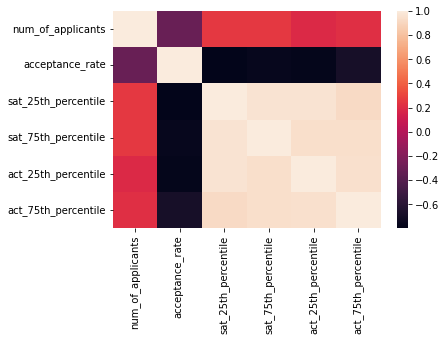

In [40]:
sns.heatmap(sat_act_college.corr())

<br>

#### Counting Colleges based on their Last Application Year with a Test Optional Policy

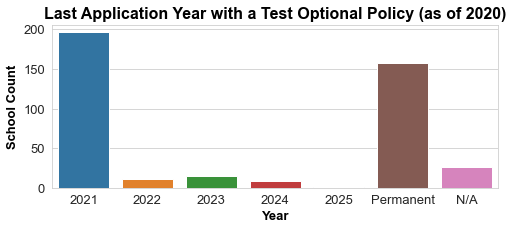

In [41]:
plt.figure(figsize=(8,3))
sns.set_style("whitegrid")
ax = sns.countplot(x='last_class_year', data=sat_act_college, order=[2021, 2022,2023,2024,2025,'Permanent','N/A']).set(title='Last Application Year with a Test Optional Policy')

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title("Last Application Year with a Test Optional Policy (as of 2020)", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Year', fontdict2)
plt.ylabel('School Count', fontdict2);

**Many schools' test optional policies lapse after 2021.**

In [42]:
sat_act_college['last_class_year'].value_counts()

2021         196
Permanent    158
N/A           26
2023          15
2022          11
2024           9
2025           1
Name: last_class_year, dtype: int64

In [43]:
sat_act_college.shape

(416, 12)

<br> 

#### Sat 25th Percentile by Acceptance Rate

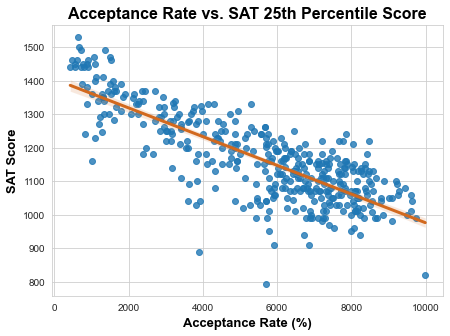

In [44]:
plt.figure(figsize=(7,5))

sns.regplot(x=sat_act_college["acceptance_rate"]*100, #show acceptance rate as a percentage
            y=sat_act_college["sat_25th_percentile"], 
            line_kws={"color":"chocolate","alpha":1,"lw":3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title("Acceptance Rate vs. SAT 25th Percentile Score", loc='center', fontdict=fontdict)
plt.xlabel('Acceptance Rate (%)', fontdict2)
plt.ylabel('SAT Score', fontdict2);

As selectivity decreases (acceptance rate increases), 25th percentile SAT score decreases.<br>

#### Sat 75th Percentile by Acceptance Rate

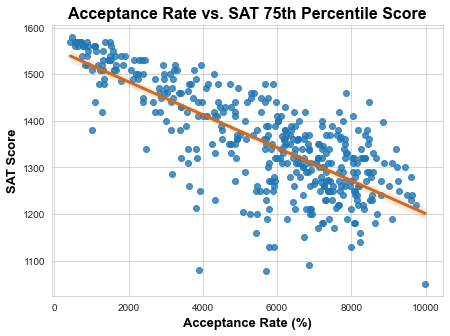

In [45]:
plt.figure(figsize=(7,5))

sns.regplot(x=sat_act_college["acceptance_rate"]*100, #show acceptance rate as a percentage
            y=sat_act_college["sat_75th_percentile"], 
            line_kws={"color":"chocolate","alpha":1,"lw":3});

fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title("Acceptance Rate vs. SAT 75th Percentile Score", loc='center', fontdict=fontdict)
plt.xlabel('Acceptance Rate (%)', fontdict2)
plt.ylabel('SAT Score', fontdict2);

**As selectivity decreases (acceptance rate increases), 75th percentile SAT score decreases.**<br><br>

#### ACT 25th Percentile by Acceptance Rate

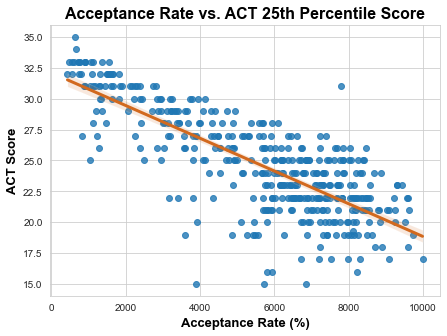

In [46]:
plt.figure(figsize=(7,5))

sns.regplot(x=sat_act_college["acceptance_rate"]*100, #show acceptance rate as a percentage
            y=sat_act_college["act_25th_percentile"], 
            line_kws={"color":"chocolate","alpha":1,"lw":3});


fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title("Acceptance Rate vs. ACT 25th Percentile Score", loc='center', fontdict=fontdict)
plt.xlabel('Acceptance Rate (%)', fontdict2)
plt.ylabel('ACT Score', fontdict2);

**As selectivity decreases (acceptance rate increases), 25th percentile ACT score decreases.**<br><br>

#### ACT 75th Percentile by Acceptance Rate

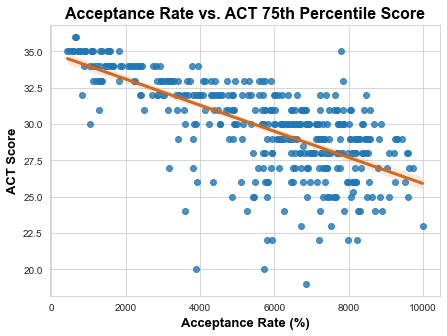

In [47]:
plt.figure(figsize=(7,5))

sns.regplot(x=sat_act_college["acceptance_rate"]*100, #show acceptance rate as a percentage
            y=sat_act_college["act_75th_percentile"], 
            line_kws={"color":"chocolate","alpha":1,"lw":3});


fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 13,
        }  
      
plt.title("Acceptance Rate vs. ACT 75th Percentile Score", loc='center', fontdict=fontdict)
plt.xlabel('Acceptance Rate (%)', fontdict2)
plt.ylabel('ACT Score', fontdict2);

**As selectivity decreases (acceptance rate increases), 75th percentile ACT score decreases.**<br><br>

#### SAT and ACT ranges

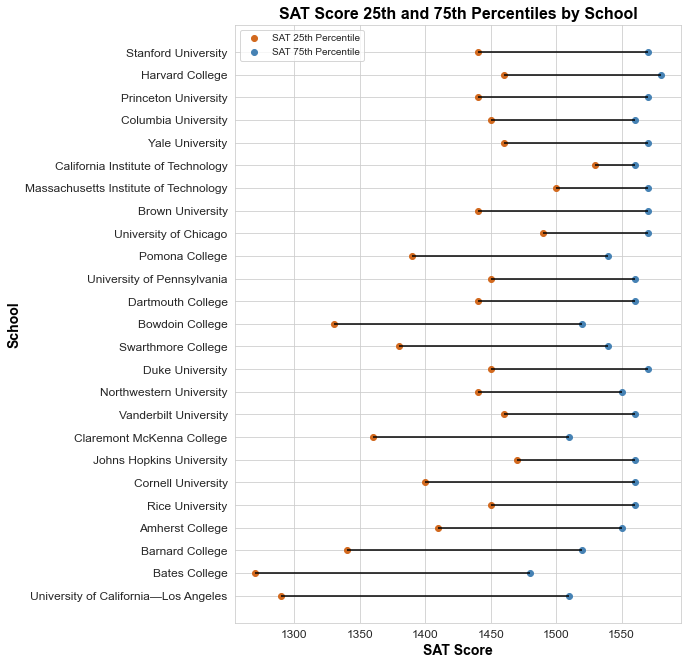

In [48]:
plt.figure(figsize=(8,11))

ordered_df = top_25.sort_values(by='acceptance_rate',ascending=False) #https://python-graph-gallery.com/184-lollipop-plot-with-2-groups
my_range=range(0,len(top_25.index))
 

plt.hlines(y=my_range, xmin=ordered_df['sat_25th_percentile'], 
           xmax=ordered_df['sat_75th_percentile'], 
           color='black', alpha=1) #setting up the lollipop chart

plt.scatter(ordered_df['sat_25th_percentile'], my_range, 
            color='chocolate', alpha=1, 
            label='SAT 25th Percentile')

plt.scatter(ordered_df['sat_75th_percentile'], my_range, 
            color='steelblue', alpha=1 , label='SAT 75th Percentile')

plt.legend()
 
fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }  
    
    

plt.yticks(my_range, ordered_df['school'])
plt.title("SAT Score 25th and 75th Percentiles by School", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('SAT Score', fontdict2)
plt.ylabel('School', fontdict2);

**Accepted SAT score ranges drop as selectivity drops.** <br><br>

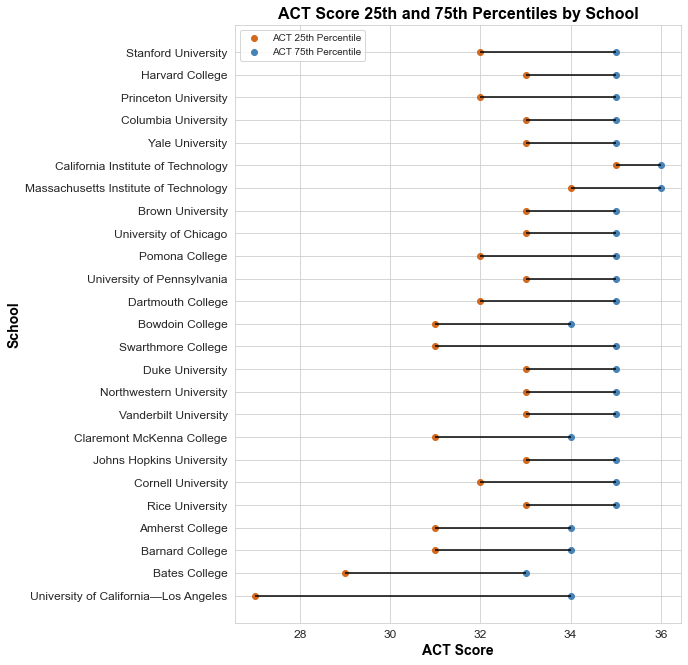

In [49]:
plt.figure(figsize=(8,11))

ordered_df = top_25.sort_values(by='acceptance_rate',ascending=False) #https://python-graph-gallery.com/184-lollipop-plot-with-2-groups
my_range=range(0,len(top_25.index))
 

plt.hlines(y=my_range, xmin=ordered_df['act_25th_percentile'], #setting up the lollipop chart
           xmax=ordered_df['act_75th_percentile'], 
           color='black', alpha=1)

plt.scatter(ordered_df['act_25th_percentile'], my_range, 
            color='chocolate', alpha=1, 
            label='ACT 25th Percentile')

plt.scatter(ordered_df['act_75th_percentile'], my_range, 
            color='steelblue', alpha=1 , 
            label='ACT 75th Percentile')
plt.legend()
 
fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }  
    
    

plt.yticks(my_range, ordered_df['school'])
plt.title("ACT Score 25th and 75th Percentiles by School", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('ACT Score', fontdict2)
plt.ylabel('School', fontdict2);

**Accepted ACT score ranges drop as selectivity drops.** <br><br>

#### Mean SAT Scores by Intended College Major

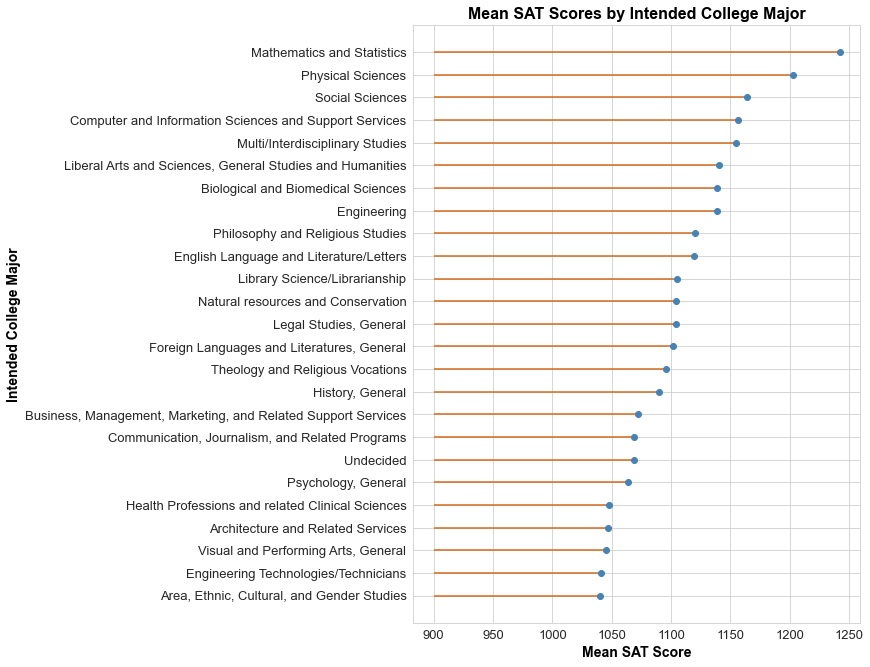

In [50]:
plt.figure(figsize=(8,11))

ordered_df = sat_major.sort_values(by='total_score', ascending=True)[-25:] #https://python-graph-gallery.com/lollipop-plot/
my_range=range(0,25)

plt.hlines(y=ordered_df['intended_college_major'][:25], #pulling the top 25 most selective colleges
           xmin=900, xmax=ordered_df['total_score'], 
           color='chocolate', alpha=1)

plt.plot(ordered_df['total_score'], my_range, "o", 
         alpha=1,color='steelblue')
 
fontdict = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }  
    
plt.title("Mean SAT Scores by Intended College Major", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Mean SAT Score', fontdict2)
plt.ylabel('Intended College Major', fontdict2);

**Students intending to pursue science-related majors tend to have higher total mean SAT scores.**

<br><br>

----

<br>

## Conclusions and Recommendations<br>


The main takeaways from my analyses are as follows:
* **Testing is important** - over half of schools will not have a test-optional policy for the 2022 application cycle ([source](https://www.compassprep.com/college-profiles/)). This finding is based on data from 2021 and may have changed. Even with test-optional policies, some students may benefit from submitting their test scores.

* **There is a strong negative correlation between test scores and school selectivity.** The more selective the school, the higher the accepted SAT and ACT scores, and vice versa ([source](https://www.compassprep.com/college-profiles/)).

* **There is a relationship between field of study and test scores.** Students intending to pursue science-related majors generally have higher total mean scores. Therefore, test takers interested in those fields should aim for even higher SAT scores to remain competitive ([source](https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf)). This takeaway is even more so directed at students applying to schools that also have selective science or engineering programs or tracks that incoming students apply to on top of general admission.
